# **Conformal Geometric Algebra and Data Visualization**

In [1]:
using Pkg
Pkg.activate(".")
using CliffordAlgebras
import CliffordAlgebras: basegrade
using LinearAlgebra: norm, normalize, dot
using LaTeXStrings
using PlotlyJS


# using Plots
include("./auxiliary.jl")
include("./constructions.jl")
# plotly();
LAYOUT = Layout(
    xaxis=attr(range=[-5, 5]),
    yaxis=attr(range=[-5, 5]),
    width=600,
    height=600
)

  Activating project at `~/Documents/Julia_Tutorials/GeometricAlgebra`


WebIO._IJuliaInit()

layout with fields height, margin, template, width, xaxis, and yaxis


In [2]:
cl = CliffordAlgebra(:CGA2D)

Cl(3,1,0)

In [3]:
e1 = cl.e1
e2 = cl.e2
e₊ = cl.e₊
e₋ = cl.e₋
# I  = pseudoscalar(cl)
# Ic = no ∧ cl.e1 ∧ cl.e2 ∧ cl.e3 ∧ n∞; # This is the "correct" pseudoscalar for the conformal model

no  = (cl.e₊ + cl.e₋)/2
n∞  = cl.e₋ - cl.e₊
propertynames(cl)

(:𝟏, :e1, :e2, :e₊, :e₋, :e1e2, :e1e₊, :e2e₊, :e1e₋, :e₋e2, :e₊e₋, :e1e₊e2, :e1e2e₋, :e1e₋e₊, :e2e₊e₋, :e1e2e₊e₋)

In [4]:
F(x) = no + x + (x ⋅ x) * n∞ /2
point(x=0,y=0)  = no + x*cl.e1 + y*cl.e2 + (x^2 + y^2) * n∞/2

p = point(1,2)
@show p ⋅ n∞
@show norm(p) == 0
@show p == F(cl.e1 + 2cl.e2);

u = [1,1]
v = [3,2]
pu = point(u...)
pv = point(v...)

-norm_sqr(u - v)/2  ≈ scalar(pu ⋅ pv)

p ⋅ n∞ = -1.0 ∈ Cl(3, 1, 0)
norm(p) == 0 = true
p == F(cl.e1 + 2 * cl.e2) = true


true

In [5]:
line(p::MultiVector, q::MultiVector) = p ∧ q ∧ n∞

function line(v::Vector, p::MultiVector=point(0,0,0))
    return p ∧ multivector(v) ∧ n∞
end

line (generic function with 3 methods)

In [20]:
l = line(point(1,1),point(0,0))
function getblades(x, blades=[:e1, :e2])
    cl = algebra(x)
    mapreduce(b -> reduce(*, getproperty.([x, cl], b)), +, blades)
end
function plotline(l::MultiVector,
        linelengthfactor=1;
        mode="lines",
        kwargs...)
    
    weight = norm(n∞ ⨼ (no ⨼ l))
    v = n∞ ⨼ (no ⨼ l)/weight
    d = getblades((no ⨼ l) / l,[:e1,:e2])
    
    lstart = linelengthfactor*v + d
    lend   = -linelengthfactor*v + d
    
    x = [i.e1 for i in [lstart,lend]]
    y = [i.e2 for i in [lstart,lend]]

    scatter(x=x,y=y,mode=mode;kwargs...) 
end

# 
function plotpoint(pts::Vector;
        mode="markers",
        kwargs...)
    
    x = [i.e1 for i in pts]
    y = [i.e2 for i in pts]
    
    # scatter(x,y;mode=mode,kwargs...) 
    scatter(x=x,y=y;kwargs...)
end

plotpoint (generic function with 1 method)

In [39]:
function plotcircle2d(C::MultiVector; mode = "lines", kwargs...)
    E = C ∧ n∞ # Carrier
    c = -(1/2)*(C * n∞ * C)/((n∞ ⨼ C)^2) # center
    center = [c.e1,c.e2]
    ρ = √scalar(C*grin(C)/(n∞ ⨼ C)^2) # radius
    
    ϕs = 0:0.1:2π
    ϕs = vcat(ϕs,0)
    tp = translate(c,point(ρ,0),[:e1,:e2])
    ts = []
    push!(ts,tp)
    A = cl.e1 ∧ cl.e2
    for ϕ in ϕs
        R  = exp(-A*ϕ/2)
        tr = R*tp*reverse(R)
        push!(ts,tr)
    end
    # plotpoint(ts; mode=mode, kwargs...)
    plotpoint(ts,mode="lines")
end

plotcircle2d (generic function with 1 method)

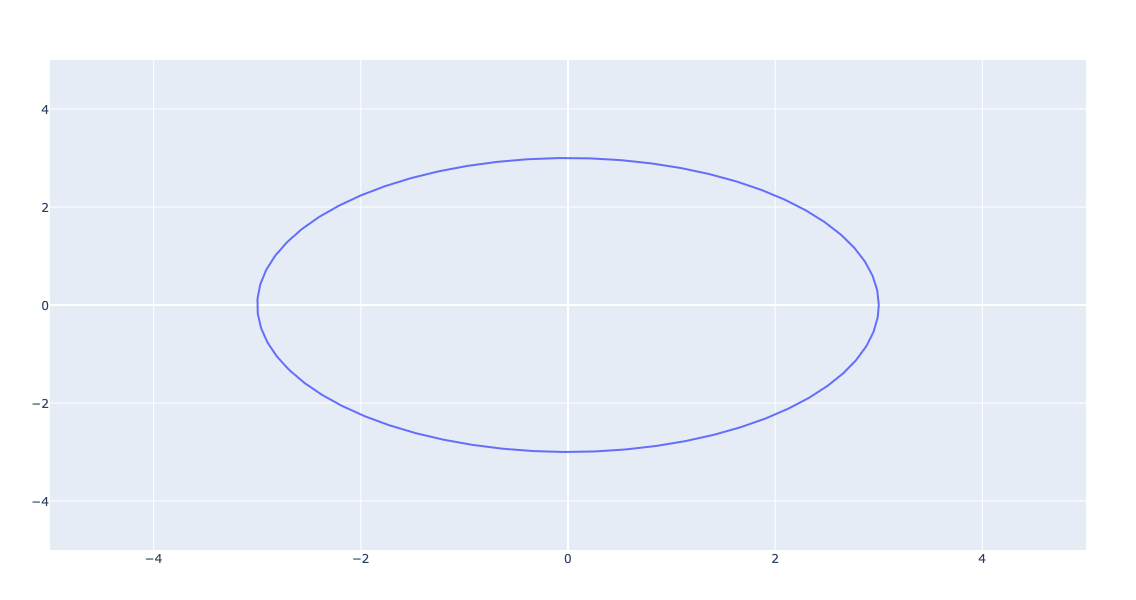

In [41]:
# circle(point(0,0),n∞,1)
circle2d(p1,r=1) = p1 + ((r^2)/2) * n∞
C = circle2d(point(1,0),2)
plot(plotcircle2d(C),LAYOUT)

In [59]:
p1 = point(-1,0)
p2 = point(0,1)
p3 = point(1,0)
C = p1 ∧ p2 ∧ p3
E = C ∧ n∞ # Carrier
c = -(1/2)*(C * n∞ * C)/((n∞ ⨼ C)^2) # center
center = [c.e1,c.e2]
ρ = √scalar(C*grin(C)/(n∞ ⨼ C)^2) # radius

# plot(plotcircle2d(p1 ∧ p2 ∧ p3),LAYOUT)
C

-2.0×e1e2e₋ ∈ Cl(3, 1, 0)

In [60]:
p1 = point(-1,0)
p2 = point(0,0)
p3 = point(1,0)
C2 = p1 ∧ p2 ∧ p3

+1.0×e1e₋e₊ ∈ Cl(3, 1, 0)

In [62]:
C2

+1.0×e1e₋e₊ ∈ Cl(3, 1, 0)